# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np

## Regression Model Evaluation

In [2]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [4]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

## 3. Calculate and print R-squared for both the training and the testing set.

In [5]:
r2_score(y_test, y_pred), r2_score(y_train, y_pred_train)

(0.7728382944250618, 0.7318762350380839)

## 4. Calculate and print mean squared error for both the training and the testing set.

In [6]:
mean_squared_error(y_test, y_pred) ** 0.5, mean_squared_error(y_train, y_pred_train) ** 0.5

(3.9299702093936806, 4.869328170049727)

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [7]:
mean_absolute_error(y_test, y_pred), mean_absolute_error(y_train, y_pred_train)

(2.9568553258606043, 3.4333524093376084)

In [8]:
np.mean(abs(y_test - y_pred)), np.mean(abs(y_train - y_pred_train))

(MEDV    2.956855
 dtype: float64,
 MEDV    3.433352
 dtype: float64)

-----

## Classification Model Evaluation

In [9]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score

In [10]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size=.20)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [12]:
logistic_model = LogisticRegression(max_iter=150)
logistic_model.fit(X_train, y_train.ravel())
y_pred = logistic_model.predict(X_test)
y_pred_train = logistic_model.predict(X_train)

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [13]:
accuracy_score(y_test, y_pred), accuracy_score(y_train, y_pred_train)

(0.9666666666666667, 0.975)

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [14]:
balanced_accuracy_score(y_test, y_pred), balanced_accuracy_score(y_train, y_pred_train)

(0.9761904761904763, 0.9731481481481481)

## 10. Calculate and print the precision score for both the training and the testing set.

In [15]:
precision_score(y_test, y_pred, average=None), precision_score(y_train, y_pred_train, average=None)

(array([1.        , 1.        , 0.90909091]),
 array([1.        , 0.97142857, 0.95121951]))

## 11. Calculate and print the recall score for both the training and the testing set.

In [16]:
recall_score(y_test, y_pred, average=None), recall_score(y_train, y_pred_train, average=None)

(array([1.        , 0.92857143, 1.        ]),
 array([1.        , 0.94444444, 0.975     ]))

## 12. Calculate and print the F1 score for both the training and the testing set.

In [17]:
f1_score(y_test, y_pred, average=None), f1_score(y_train, y_pred_train, average=None)

(array([1.        , 0.96296296, 0.95238095]),
 array([1.        , 0.95774648, 0.96296296]))

## 13. Generate confusion matrices for both the training and the testing set.

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

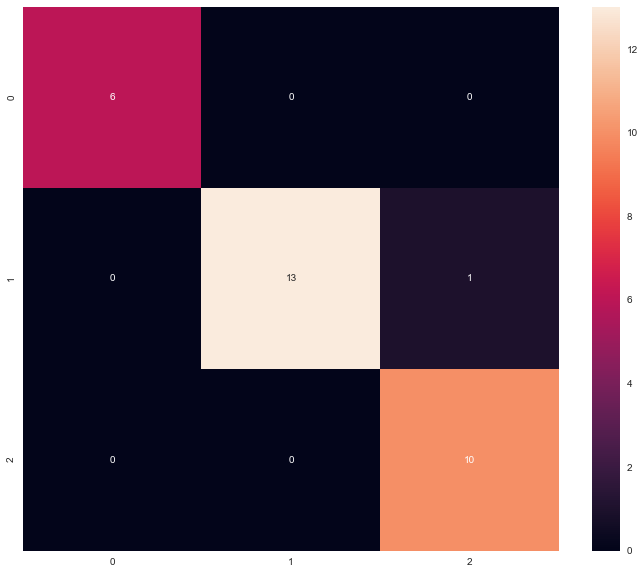

In [19]:
conf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,10))
sns.heatmap(conf, annot=True);

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [21]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
y_pred_train = tree.predict(X_train)

In [22]:
def metrics(y_test, y_pred, multiClass=False):
    k = 'binary'
    if multiClass == True:
        k = None
    return {
        'accuracy score': accuracy_score(y_test, y_pred),
        'balanced accuracy score': balanced_accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average=k),
        'recall': recall_score(y_test, y_pred, average=k),
        'f-score': f1_score(y_test, y_pred, average=k)
    }

In [23]:
metrics(y_test, y_pred, multiClass=True)

{'accuracy score': 0.9666666666666667,
 'balanced accuracy score': 0.9761904761904763,
 'precision': array([1.        , 1.        , 0.90909091]),
 'recall': array([1.        , 0.92857143, 1.        ]),
 'f-score': array([1.        , 0.96296296, 0.95238095])}

In [24]:
sum(cross_val_score(tree, X_train, y_train, cv=30)) / 30

0.9416666666666667